importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

importing the dataset

In [4]:
data = {
"Student": ["Alice", "Bob", "Charlie", "David", "Emily", "Frank", "Grace", "Henry", "Isabella", "Jack"],
"Math": [85, 76, 90, 65, 88, 72, 95, 80, 78, 60],
"Science": [78, 85, 92, 70, 86, 75, 98, 82, 80, 65],
"English": [92, 74, 88, 72, 91, 70, 96, 78, 85, 70],
"History": [80, 90, 86, 68, 85, 78, 94, 81, 88, 68],
"Computer Science": [88, 82, 94, 75, 89, 80, 99, 85, 83, 72]
}
data = pd.DataFrame(data)

computing the averages

In [5]:
data["Average Marks"] = data.iloc[:, 1:].mean(axis=1)
def assign_grade(avg_marks):
  if avg_marks >= 85:
    return "S"
  elif avg_marks >= 75:
    return "A"
  else:
    return "B"
data["Grade"] = data["Average Marks"].apply(assign_grade)

encoding the numerical labels

In [6]:
grade_mapping = {"S": 2, "A": 1, "B": 0}
data["Grade Label"] = data["Grade"].map(grade_mapping)

training and test data

In [9]:
grade_mapping = {"S": 2, "A": 1, "B": 0}
data["Grade Label"] = data["Grade"].map(grade_mapping)
X = data.iloc[:, 1:6].values # Extract subject marks as features
y = data["Grade Label"].values # Use Grade Labels as targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y,random_state=42)

standartising the features

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

creating the svm models

In [11]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

making predictions

In [12]:
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)

class_report_rbf = classification_report(y_test, y_pred_rbf, target_names=["B", "A", "S"])
class_report_poly = classification_report(y_test, y_pred_poly, target_names=["B", "A", "S"])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

plotting the graphs

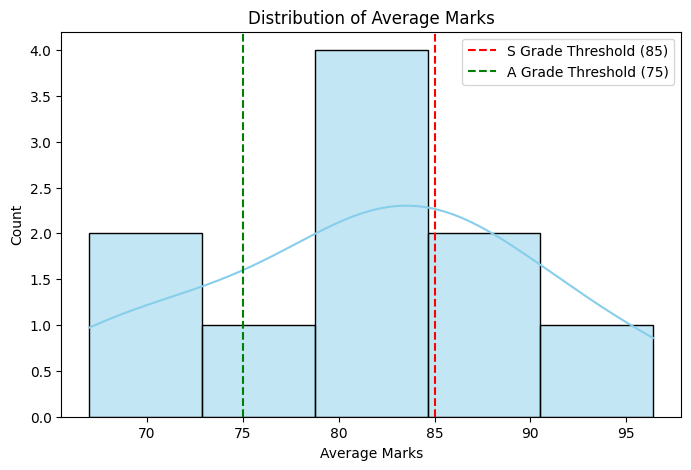

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Average Marks"], bins=5, kde=True, color="skyblue")
plt.axvline(x=85, color='r', linestyle='--', label='S Grade Threshold (85)')
plt.axvline(x=75, color='g', linestyle='--', label='A Grade Threshold (75)')
plt.xlabel("Average Marks")
plt.ylabel("Count")
plt.title("Distribution of Average Marks")
plt.legend()
plt.show()

<ipython-input-19-830fb4276414>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Grade"], palette="coolwarm")


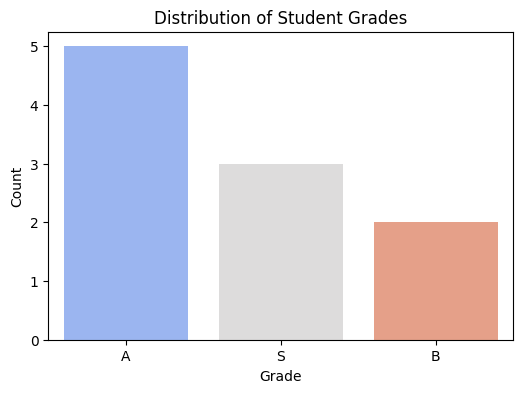

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["Grade"], palette="coolwarm")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Distribution of Student Grades")
plt.show()

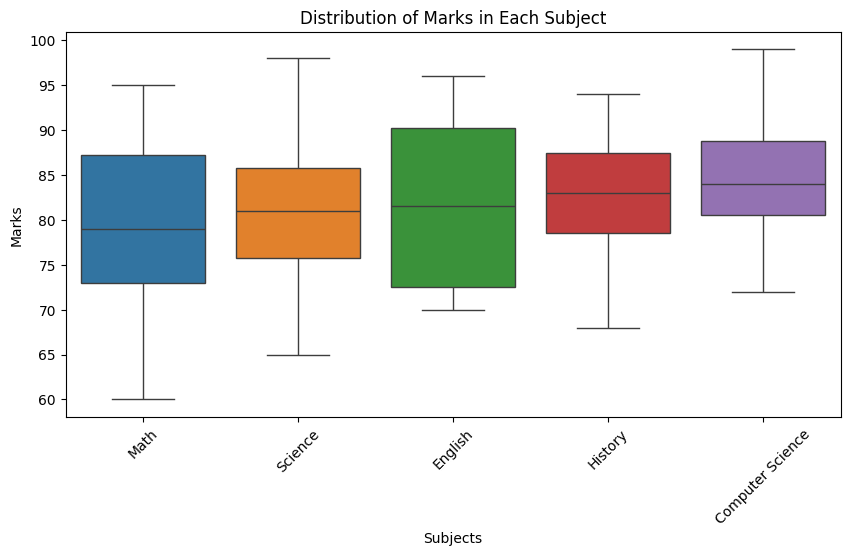

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data.iloc[:, 1:6])
plt.xticks(rotation=45)
plt.title("Distribution of Marks in Each Subject")
plt.xlabel("Subjects")
plt.ylabel("Marks")
plt.show()

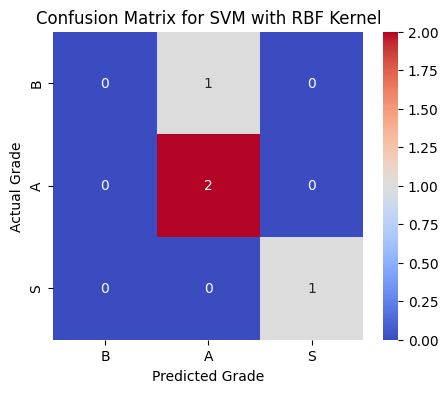

In [21]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rbf, annot=True, fmt="d", cmap="coolwarm",
xticklabels=["B", "A", "S"], yticklabels=["B", "A", "S"])
plt.xlabel("Predicted Grade")
plt.ylabel("Actual Grade")
plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.show()

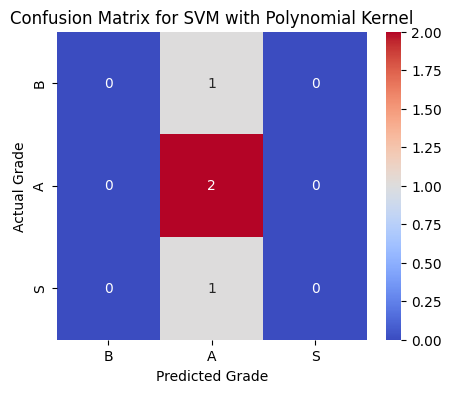

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_poly, annot=True, fmt="d", cmap="coolwarm",
xticklabels=["B", "A", "S"], yticklabels=["B", "A", "S"])
plt.xlabel("Predicted Grade")
plt.ylabel("Actual Grade")
plt.title("Confusion Matrix for SVM with Polynomial Kernel")
plt.show()

decision boundary for polynomial kernal

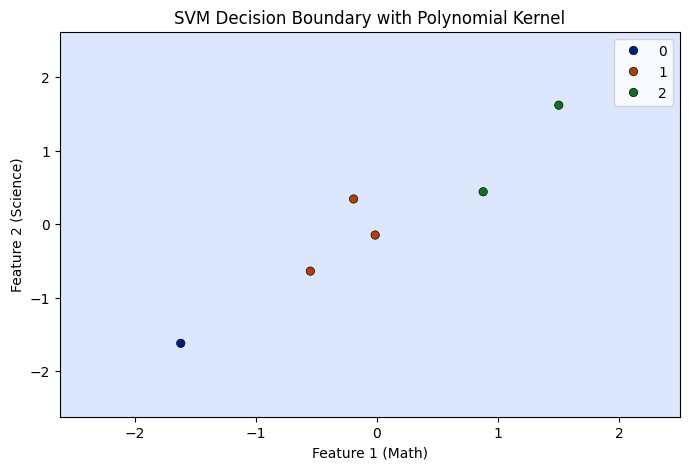

In [25]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max,
100))
Z_poly = svm_poly.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()),
np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z_poly = Z_poly.reshape(xx.shape)
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z_poly, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="dark",
edgecolor="black")
plt.xlabel("Feature 1 (Math)")
plt.ylabel("Feature 2 (Science)")
plt.title("SVM Decision Boundary with Polynomial Kernel")
plt.show()

classification

In [26]:
print("Classification Report for RBF Kernel:")
print(class_report_rbf)
print("\nClassification Report for Polynomial Kernel:")
print(class_report_poly)

Classification Report for RBF Kernel:
              precision    recall  f1-score   support

           B       0.00      0.00      0.00         1
           A       0.67      1.00      0.80         2
           S       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4


Classification Report for Polynomial Kernel:
              precision    recall  f1-score   support

           B       0.00      0.00      0.00         1
           A       0.50      1.00      0.67         2
           S       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.25      0.50      0.33         4

